In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = nb.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5224586288416075
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.54      0.51        65
           1       0.35      0.12      0.17        52
           2       0.36      0.32      0.34        59
           3       0.38      0.98      0.54        64
           4       1.00      0.99      0.99        75
           5       0.64      0.26      0.37        53
           6       0.56      0.18      0.27        55

    accuracy                           0.52       423
   macro avg       0.54      0.48      0.46       423
weighted avg       0.56      0.52      0.49       423

Confusion Matrix:
 [[35  6  4 15  0  5  0]
 [25  6  5 10  0  1  5]
 [ 1  2 19 34  0  2  1]
 [ 0  1  0 63  0  0  0]
 [ 0  0  0  1 74  0  0]
 [ 5  2 14 16  0 14  2]
 [ 5  0 11 29  0  0 10]]


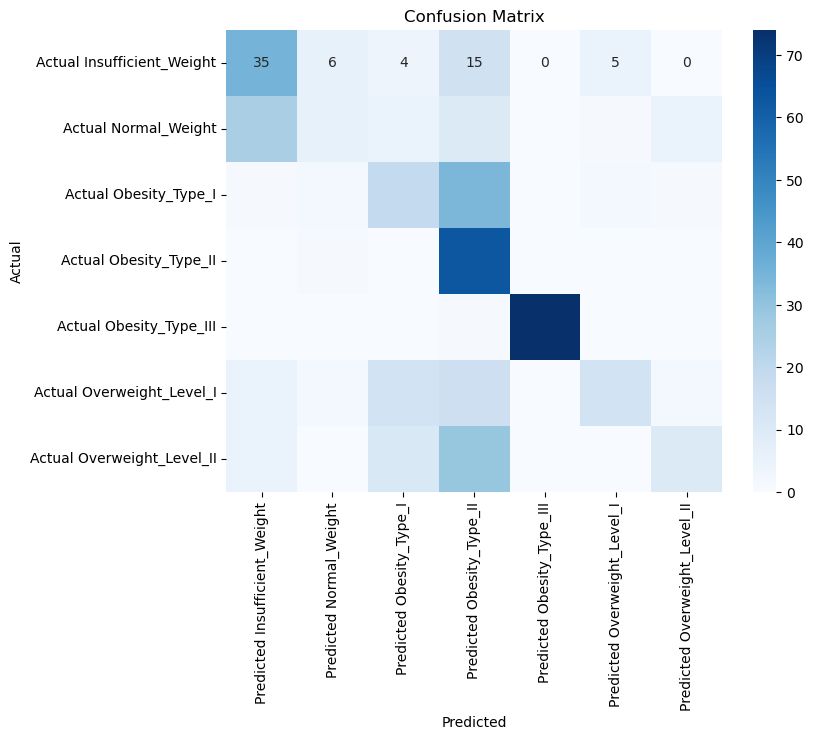

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Insufficient_Weight', 'Predicted Normal_Weight', 'Predicted Obesity_Type_I', 'Predicted Obesity_Type_II', 'Predicted Obesity_Type_III', 'Predicted Overweight_Level_I', 'Predicted Overweight_Level_II'], yticklabels=['Actual Insufficient_Weight', 'Actual Normal_Weight', 'Actual Obesity_Type_I', 'Actual Obesity_Type_II', 'Actual Obesity_Type_III', 'Actual Overweight_Level_I', 'Actual Overweight_Level_II'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()